## Prediction:
---

### Mount Drive:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
ROOT = "/content/drive/MyDrive/Colab Notebooks/DeepLearning/CV/Object Detection/Vehicle Number Plate Detection"
os.chdir(ROOT)
dir_path = os.getcwd()
dir_path

'/content/drive/MyDrive/Colab Notebooks/DeepLearning/CV/Object Detection/Vehicle Number Plate Detection'

### Install Packages

```python
!pip install opencv-python
!pip install pytesseract
```

In [ ]:
# !sudo apt install tesseract-ocr
# !pip install pytesseract

### Import Required Libraries:

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import pytesseract as pt
import plotly.express as px
import matplotlib.pyplot as plt
import xml.etree.ElementTree as xet

# from skimage import io
from tensorflow.keras.preprocessing.image import load_img, img_to_array

### Create pipeline:

In [ ]:
# Loading saved model
model = tf.keras.models.load_model('./model_number_plate.h5')

In [ ]:
def number_plate_detection(path):
  try:
    # Read Image
    image = load_img(path) # PIL object
    image = np.array(image, dtype=np.uint8) # 8 bit array (0, 255)
    image1 = load_img(path, target_size=(224, 224))

    # Data preprocessing
    image_arr_224 = img_to_array(image1)/255.0   # Convert into array and get the normalized output
    h, w, d = image.shape    # Size of the orginal image
    print('Size of the image: Height: {} & Width: {}'.format(h, w))
    
    test_arr = image_arr_224.reshape(1, 224, 224, 3)
    # in order to pass this image of a model, we need to provide the data in the dynamic fourth dimension. 
    # Here one indicates is a number of images, so we are just passing only one image.
    
    # Make predictions
    coords = model.predict(test_arr)
    
    # De-normalize the values
    denorm = np.array([w, w, h, h])
    coords = coords * denorm
    coords = coords.astype(np.int32)
    
    # Draw bounding on top the image
    xmin, xmax, ymin, ymax = coords[0]
    p1 =(xmin, ymin)
    p2 =(xmax, ymax)
    print(p1, p2)
    cv2.rectangle(image, p1, p2, (0, 255, 0), 3)
    return image, coords
  
  except Exception as e:
    print('Error: ', e)

Size of the image: Height: 720 & Width: 1080
(245, 308) (454, 365)



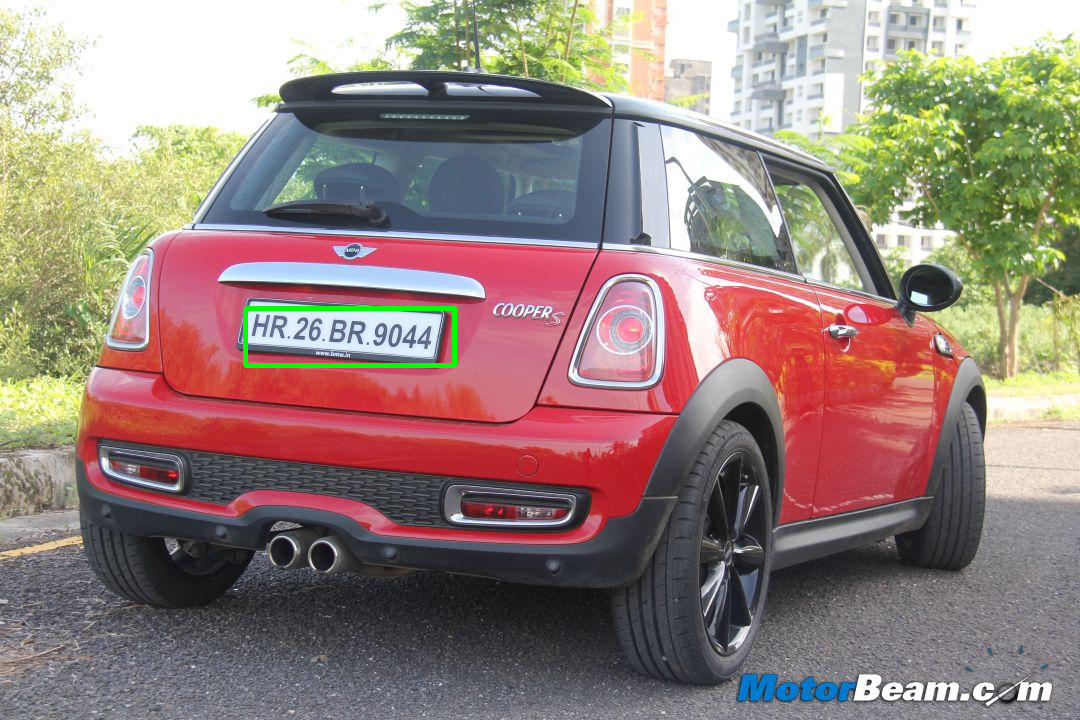

In [ ]:
path = 'imgs/test_imgs/car01.jpg'
image, coords = number_plate_detection(path)

fig = px.imshow(image)
fig.update_layout(width=750, height=500,  margin=dict(l=10, r=10, b=10, t=10), xaxis_title='Test Image')

## OCR : Optical Character Recognition
---

**Extrating Number Plate From Image:**
- First, need to load image and convert to array, then crop the bounding box with coordinates of it, now identify region of interest (ROI).


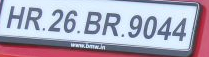

In [ ]:
img = np.array(load_img(path))
xmin , xmax, ymin, ymax = coords[0]
roi = img[ymin:ymax, xmin:xmax]
fig = px.imshow(roi)
fig.update_layout(width=600, height=300, 
                  margin=dict(l=10, r=10, b=10, t=10), 
                  xaxis_title='Bounding Box cropped image')

In [ ]:
# extract text from image
text = pt.image_to_string(roi)
print(text)

HR.26.BR 90445



Seems like, model is working fine. 
- We can improve the accuracy by training model with more clear images/HD images and by increasing dataset size.

---
---